# Kenneth Kakie Assignment 1

Part 1: Frailty

In [ ]:
pip install pandas

In [ ]:
import pandas as pd

In [ ]:
#code

df = pd.read_csv('../data_raw/Frailty.csv')
df.head(10)

,Height,Weight,Age,"Grip ""strength""",Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


In [27]:
df.rename(columns={"Grip \"strength\"": "Grip_Strength"}, inplace=True)
df.columns

Index(['Height', 'Weight', 'Age', 'Grip_Strength', 'Frailty'], dtype='object')

a.	Unit standardization

    i.	Height_m = Height_in * 0.0254
    ii.	Weight_kg = Weight_lb * 0.45359237

In [28]:
#df.insert(loc, column, value)
sdf = df.copy(deep=True)
sdf.insert(1, "Height_m", sdf.Height*0.0254)
sdf.insert(3, "Weight_kg", sdf.Weight*0.45359237)

In [55]:
sdf

,Height,Height_m,Weight,Weight_kg,Age,Grip_Strength,Frailty
0,65.8,1.67132,112,50.802345,30,30,N
1,71.5,1.81610,136,61.688562,19,31,N
2,69.4,1.76276,153,69.399633,45,29,N
3,68.2,1.73228,142,64.410117,22,28,Y
4,67.8,1.72212,144,65.317301,29,24,Y
5,68.7,1.74498,123,55.791862,50,26,N
6,69.8,1.77292,141,63.956524,51,22,Y
7,70.1,1.78054,136,61.688562,23,20,Y
8,67.9,1.72466,112,50.802345,17,19,N
9,66.8,1.69672,120,54.431084,39,31,N


b.	Feature engineering

    i.	BMI = Weight_kg / (Height_m ** 2) (round to 2 decimals).
    ii.	AgeGroup (categorical): "<30", "30–45", "46–60", ">60" based on Age_yr.


In [30]:

fdf = sdf.copy(deep=True)
fdf.insert(4, "BMI", round((fdf.Weight_kg / ((fdf.Height_m ** 2))),2))
fdf

,Height,Height_m,Weight,Weight_kg,BMI,Age,Grip_Strength,Frailty
0,65.8,1.67132,112,50.802345,18.19,30,30,N
1,71.5,1.81610,136,61.688562,18.70,19,31,N
2,69.4,1.76276,153,69.399633,22.33,45,29,N
3,68.2,1.73228,142,64.410117,21.46,22,28,Y
4,67.8,1.72212,144,65.317301,22.02,29,24,Y
5,68.7,1.74498,123,55.791862,18.32,50,26,N
6,69.8,1.77292,141,63.956524,20.35,51,22,Y
7,70.1,1.78054,136,61.688562,19.46,23,20,Y
8,67.9,1.72466,112,50.802345,17.08,17,19,N
9,66.8,1.69672,120,54.431084,18.91,39,31,N


c.	Categorical → numeric encoding

    i.	Binary encoding: Frailty_binary (Y→1, N→0, store as int8).
    ii.	One‑hot encode AgeGroup into columns: AgeGroup_<30, AgeGroup_30–45, AgeGroup_46–60, AgeGroup_>60


In [ ]:
# df.replace({'A': {0: 100, 4: 400}})
bdf = fdf.copy(deep=True)
# bdf.replace({'Frailty' : {'Y':1,'N':0}})
print(bdf.columns)
bdf['Frailty_binary'] = bdf['Frailty'].replace({'Y': 1, 'N': 0}).astype('int8')
bdf


Index(['Height', 'Height_m', 'Weight', 'Weight_kg', 'BMI', 'Age',
       'Grip_Strength', 'Frailty'],
      dtype='object')


C:\Users\kkaki\AppData\Local\Temp\ipykernel_9508\3282700094.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Y': 1, 'N': 0})


,Height,Height_m,Weight,Weight_kg,BMI,Age,Grip_Strength,Frailty,Frailty_binary
0,65.8,1.67132,112,50.802345,18.19,30,30,N,0
1,71.5,1.81610,136,61.688562,18.70,19,31,N,0
2,69.4,1.76276,153,69.399633,22.33,45,29,N,0
3,68.2,1.73228,142,64.410117,21.46,22,28,Y,1
4,67.8,1.72212,144,65.317301,22.02,29,24,Y,1
5,68.7,1.74498,123,55.791862,18.32,50,26,N,0
6,69.8,1.77292,141,63.956524,20.35,51,22,Y,1
7,70.1,1.78054,136,61.688562,19.46,23,20,Y,1
8,67.9,1.72466,112,50.802345,17.08,17,19,N,0
9,66.8,1.69672,120,54.431084,18.91,39,31,N,0


d.	EDA & Reporting 

    I.	Compute summary table: mean/median/std for numeric columns; save to reports/findings.md.
    II.	Quantify relation of strength ↔ frailty: compute correlation between Grip_kg and Frailty_binary, and report it.

In [36]:
numeric_df = bdf[['Height_m','Weight_kg','BMI','Age','Grip_Strength','Frailty_binary']]

In [ ]:
pip install tabulate

In [ ]:
summary = pd.DataFrame({
    "Mean": numeric_df.mean(),
    "Median": numeric_df.median(),
    "STD": numeric_df.std()
})

summary.to_markdown("../reports/findings.md")
summary

,Mean,Median,STD
Height_m,1.742440,1.738630,0.042435
Weight_kg,59.828834,61.688562,6.455441
BMI,19.682000,19.185000,1.780972
Age,32.500000,29.500000,12.860361
Grip_Strength,26.000000,27.000000,4.521553
Frailty_binary,0.400000,0.000000,0.516398


In [58]:
a = numeric_df['Grip_Strength'].corr(numeric_df['Frailty_binary'])
b = f"{a}"

with open("../reports/findings_strength_correlation.md", "w") as f:
    f.write(b)

In [ ]:
#
#
#
#
#
#
#
#

Part 2: Visualizations

Each figure: 800×600 px, 300 DPI, title, labeled axes/units, legend if applicable, readable ticks. 
For each, add a 5–8 sentence interpretation to reports. 

Before the visualizations (analysis step) you need to perform ingestion stage and preprocessing step (missing values etc.)

In [59]:
df = pd.read_csv('../data_raw/StudentsPerformance.csv')
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [64]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

A.	V1 — Gender boxplots (math vs reading) (2 pts)

a.	Question: Are there gender differences in math vs reading?

b.	Chart: Side‑by‑side boxplots of math score and reading score grouped by gender.


In [61]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.8 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 6.1 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 6.3 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 6.5 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 6.6 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.4 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.3 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 6.1 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------ --------------------------------- 1.0/7.0 MB 6.5 MB/s eta 0:00:01
   ------------- ----------------------

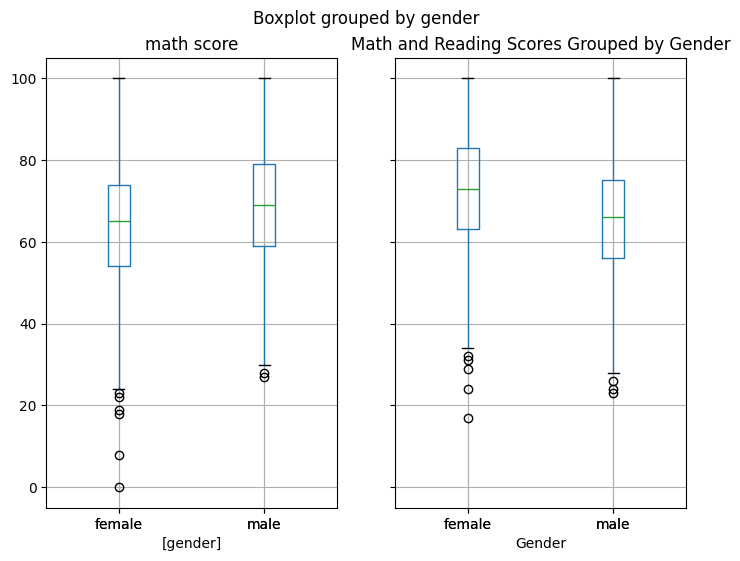

In [107]:
import matplotlib.pyplot as plt

df[["gender","math score","reading score"]].boxplot(
     by="gender", figsize=(8, 6)
)
plt.xticks()
plt.title("Math and Reading Scores Grouped by Gender")
plt.xlabel("Gender")
plt.ylabel("Score")
plt.show()



B.	V2 — Test prep impact on math (2 pts)

a.	Question: Do students who completed test prep score higher in math?

b.	Chart: Any chart of your choice for math score by test preparation course (completed vs none).


<Axes: title={'center': 'math score'}, xlabel='[test preparation course]'>

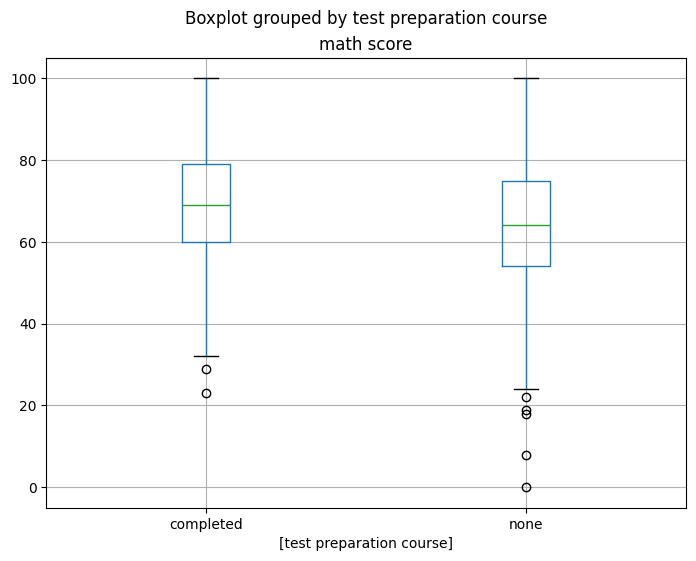

In [88]:
df[['test preparation course','math score']].boxplot(by='test preparation course',figsize=(8,6))

C.	V3 — Lunch type and average performance (2 pts)

a.	Question: Does lunch type (standard vs free/reduced) relate to outcomes?

b.	Chart: Grouped bar chart of mean overall_avg of all the scores (math, reading, writing) by lunch.


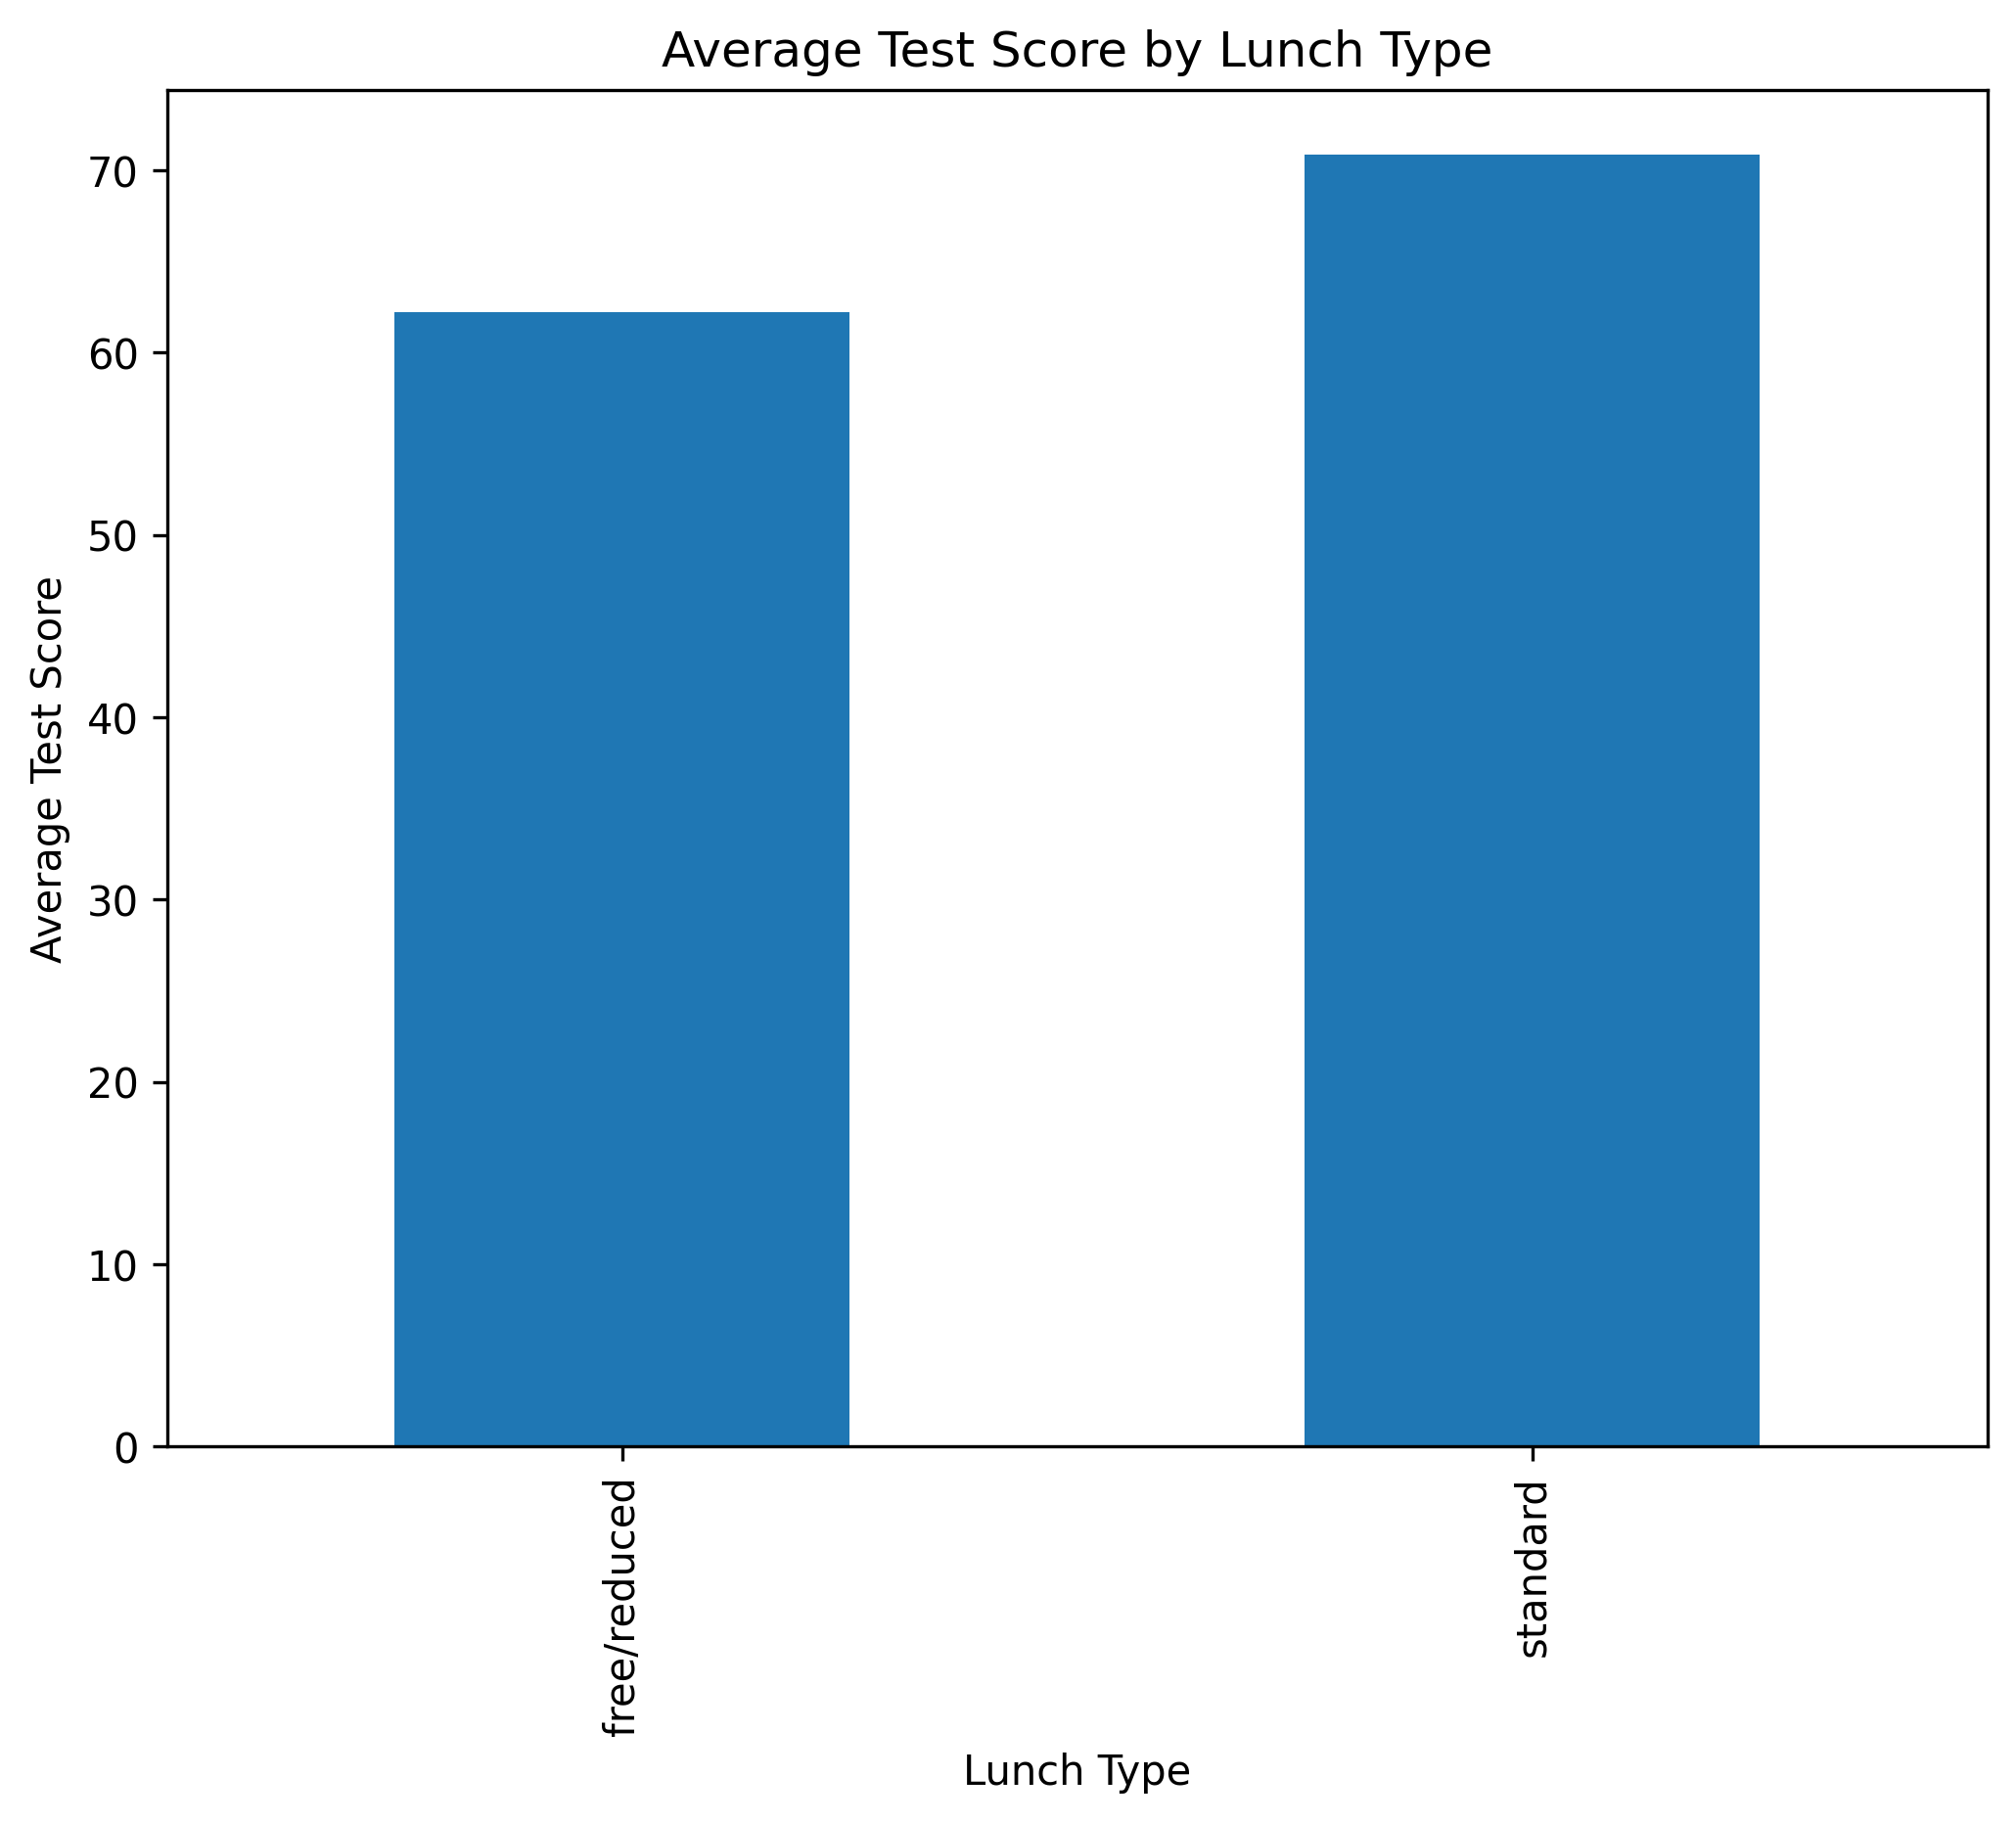

In [ ]:
ydf = df.copy(deep=True)
ydf["overall_avg"] = ydf[["math score", "reading score", "writing score"]].mean(axis=1)
avg_scores = ydf.groupby("lunch")["overall_avg"].mean()

plt.figure(figsize=(8, 6), dpi=300)
avg_scores.plot(kind="bar")

plt.xticks() 

plt.title("Average Test Score by Lunch Type")
plt.xlabel("Lunch Type")
plt.ylabel("Average Test Score")
plt.show()

D.	V4 — Subject correlations (2 pts)

a.	Question: How strongly do the three subjects move together?

b.	Chart: Correlation heatmap for math, reading, writing with annotated coefficients.


In [98]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


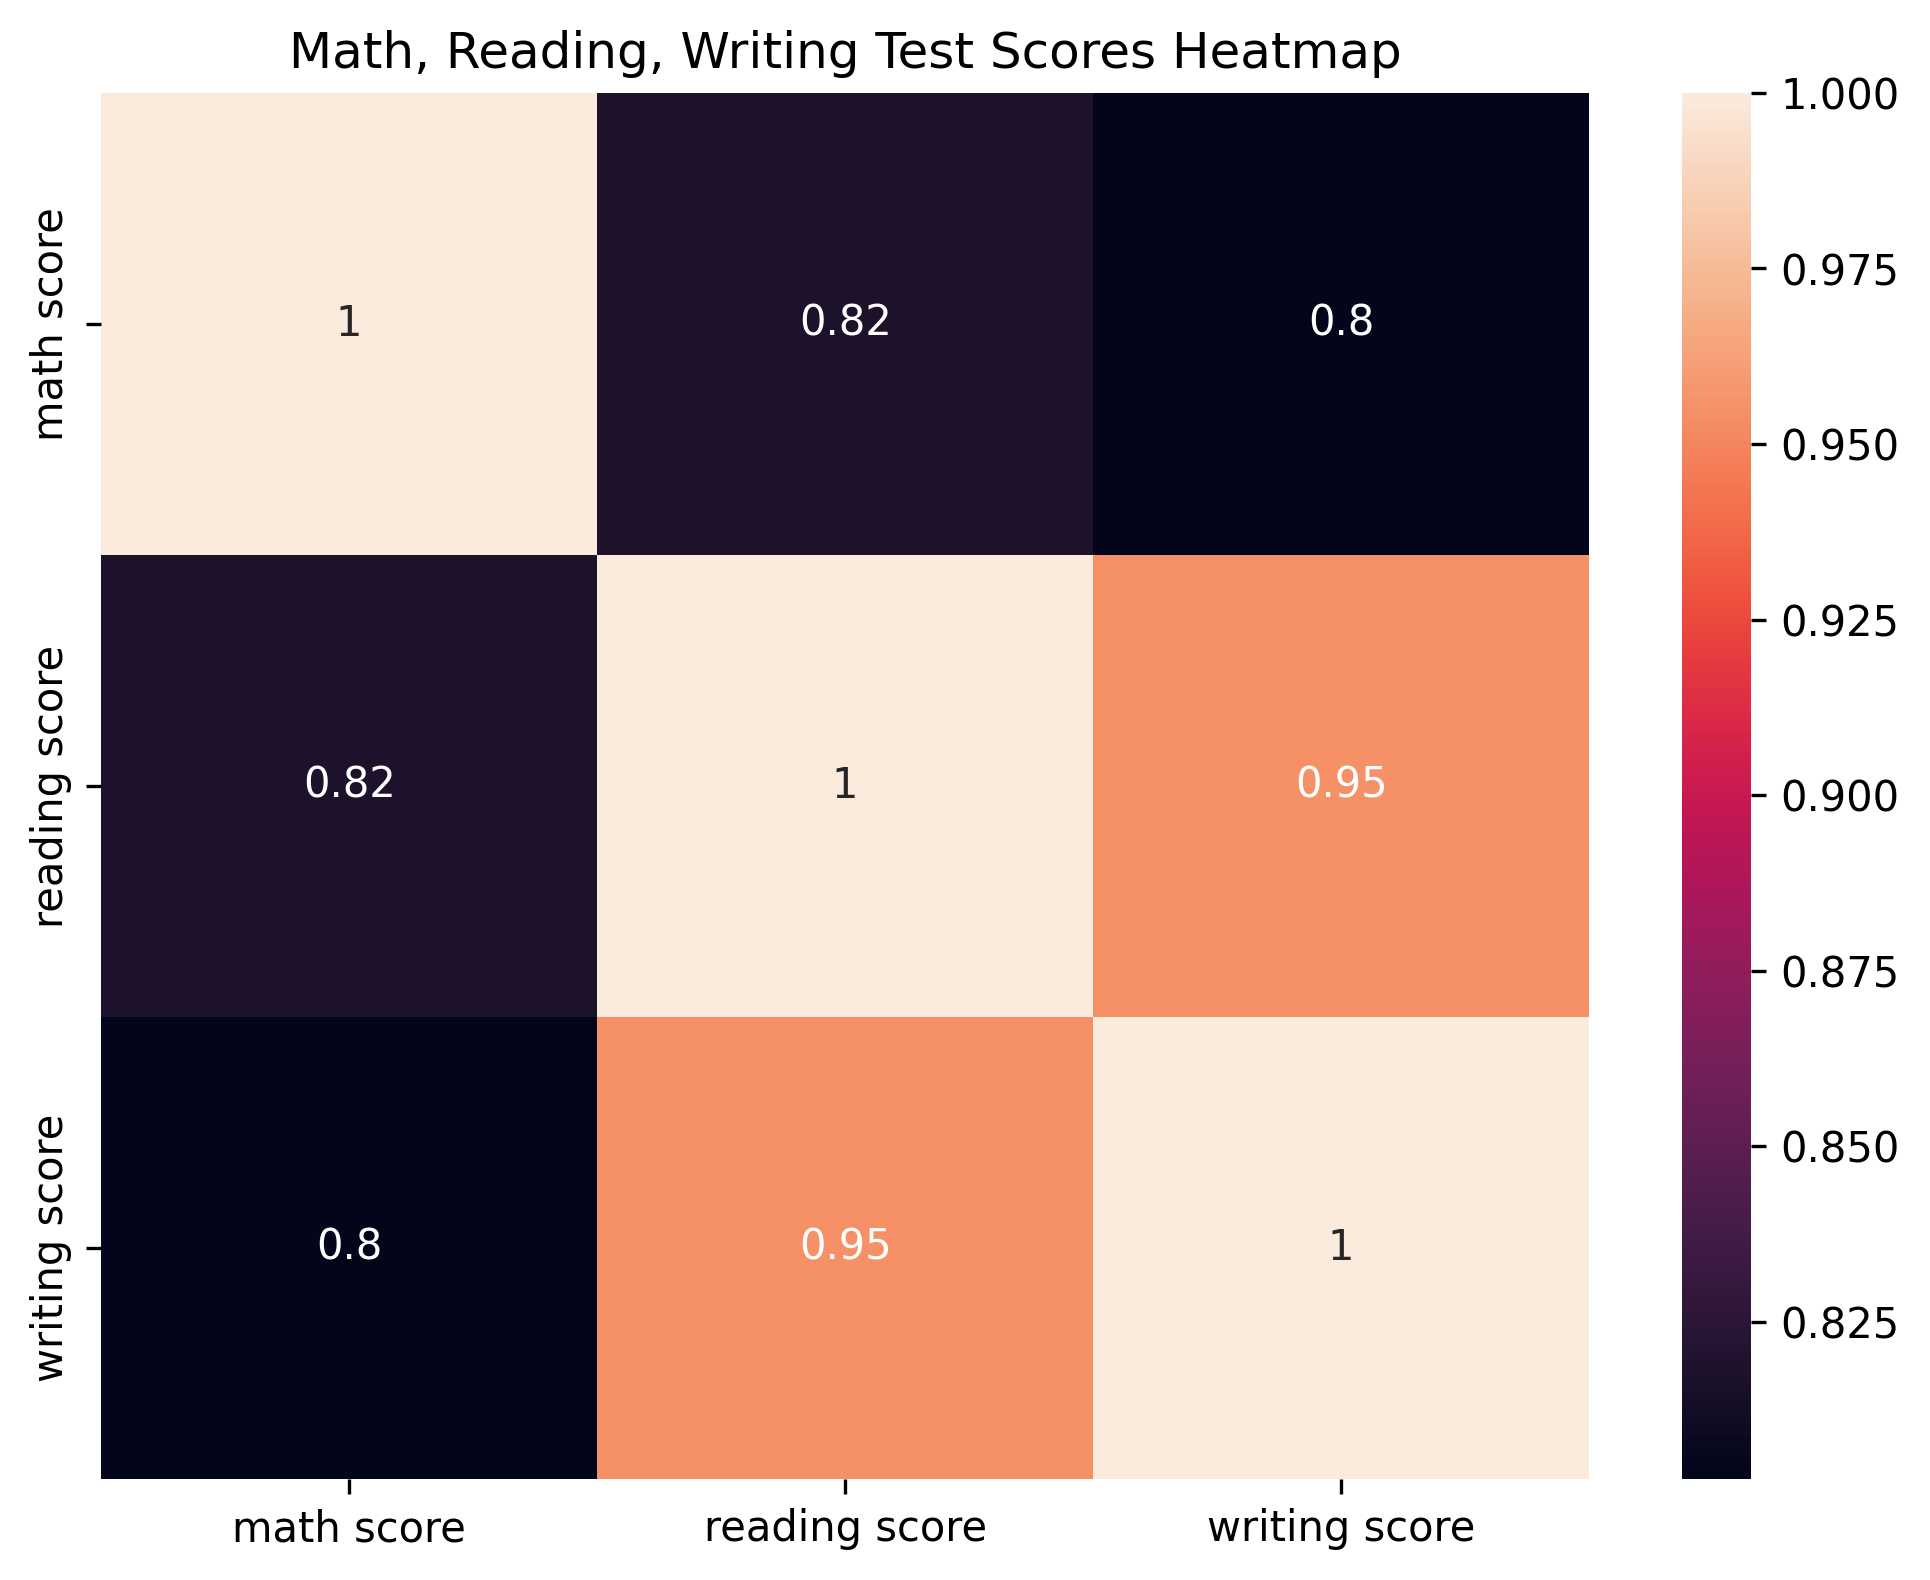

In [103]:
import seaborn as sns

# Creating correlation matrix values
corr = df[["math score", "reading score", "writing score"]].corr()

plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(corr, annot=True)

plt.title("Math, Reading, Writing Test Scores Heatmap")
plt.show()

E.	V5 — Math vs reading with trend lines by test prep (2 pts)

    a.	Question: How strongly are math and reading scores associated, and do students who completed the test‑preparation course have a different slope in the math–reading relationship than those who did not?

    b.	Chart: Scatter plot with two straight best‑fit lines (one for each group: test prep's completed and none).

        i.	X‑axis: reading score 

        ii.	Y‑axis: math score

    c.	Color: Points colored by test preparation course (legend must show the two groups and each group’s n).


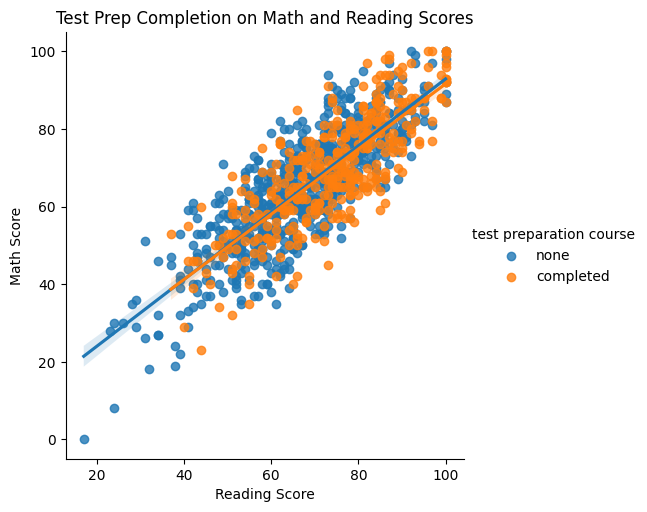

In [106]:
sns.lmplot(
    data=df,
    x="reading score", y="math score",
    hue="test preparation course",  # separate lines
)

plt.title("Test Prep Completion on Math and Reading Scores")
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.show()